In [5]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter

Query that produced the CME list:  https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/CME?startDate=2010-01-01&endDate=2010-12-31


In [6]:
# Specify the directory and pattern (e.g., all JSON files)
directory = '.'

# Get a list of files matching the pattern
#files = glob.glob(pattern)
files = os.listdir(directory)

# Optionally, get only the file names
file_names = [os.path.basename(f) for f in files]

cme_file = [s for s in file_names if '.json' in s]

# Print the list of files
print(sorted(cme_file))

['CME2010.json', 'CME2011.json', 'CME2012.json', 'CME2013.json', 'CME2014.json', 'CME2015.json', 'CME2016.json', 'CME2017.json', 'CME2018.json', 'CME2019.json', 'CME2020.json', 'CME2021.json', 'CME2022.json', 'CME2023.json']


In [7]:
# List to hold the combined data
#combined_data = []

# Loop through each JSON file
#for file_path in cme_file:
#    with open(file_path, 'r') as file:
#        data = json.load(file)
#        combined_data.extend(data)

# Save the combined JSON data to a new file
#output_file = './all_cmes.json'
#with open(output_file, 'w') as file:
#    json.dump(combined_data, file, indent=4)

In [8]:
f = open('all_cmes.json')
data = json.load(f)

# Extract all unique keys from the JSON elements
unique_keys = set()
for element in data:
    unique_keys.update(element.keys())

# Print the unique keys
print(unique_keys)
#val = (data[0]['cmeAnalyses'])
print(len(data))



{'cmeAnalyses', 'linkedEvents', 'note', 'activityID', 'instruments', 'activeRegionNum', 'link', 'submissionTime', 'sourceLocation', 'startTime', 'catalog'}
5787


In [9]:
unique_instruments = set()
for entry in data:
    if 'instruments' in entry:
        for instrument in entry['instruments']:
            unique_instruments.add(instrument['displayName'])

# Convert to a sorted list
sorted_unique_instruments = sorted(list(unique_instruments))
sorted_unique_instruments

['SOHO: LASCO/C2',
 'SOHO: LASCO/C3',
 'STEREO A: SECCHI/COR2',
 'STEREO B: SECCHI/COR2']

(2629, 1121, 202, 1, 202, 339, 67, 34, 684, 35, 96, 168, 142, 32, 22, 13)


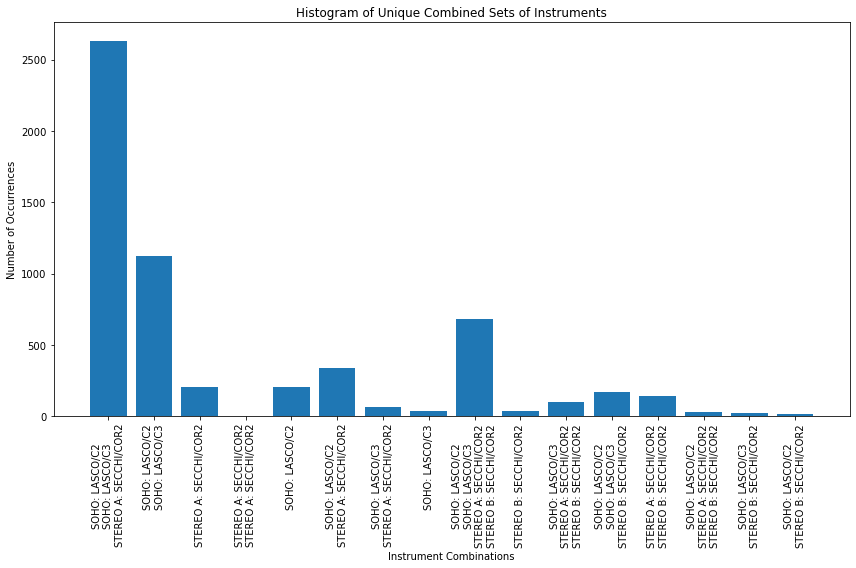

In [14]:
# Extract unique combinations of instruments
instrument_combinations = []
for entry in data:
    if 'instruments' in entry:
        instruments = sorted([instrument['displayName'] for instrument in entry['instruments']])
        instrument_combinations.append(tuple(instruments))

# Count the occurrences of each combination
combination_counts = Counter(instrument_combinations)
# Prepare data for histogram
labels, values = zip(*combination_counts.items())

# Plot histogram with switched axes
plt.figure(figsize=(12, 8))
plt.bar(range(len(values)), values, tick_label=['\n'.join(label) for label in labels])
plt.ylabel('Number of Occurrences')
plt.xlabel('Instrument Combinations')
plt.title('Histogram of Unique Combined Sets of Instruments')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
print(labels[13:], values[13:])
# C2, C3, COR2A, COR2B: 684
# C2, C3, COR2A:  2629
# C2, C3, COR2B: 168
# C3, COR2A, COR2B: 96
# C2, COR2A, COR2B: 32
# C2, COR2A: 339
# C3, COR2A: 67
# C3, COR2B: 22
# C2, COR2B: 13


(('SOHO: LASCO/C2', 'STEREO A: SECCHI/COR2', 'STEREO B: SECCHI/COR2'), ('SOHO: LASCO/C3', 'STEREO B: SECCHI/COR2'), ('SOHO: LASCO/C2', 'STEREO B: SECCHI/COR2')) (32, 22, 13)


In [10]:
# Extract unique combinations of instruments
instrument_combinations = []
for entry in data:
    if 'instruments' in entry:
        instruments = sorted([instrument['displayName'] for instrument in entry['instruments']])
        instrument_combinations.append(tuple(instruments))


22519


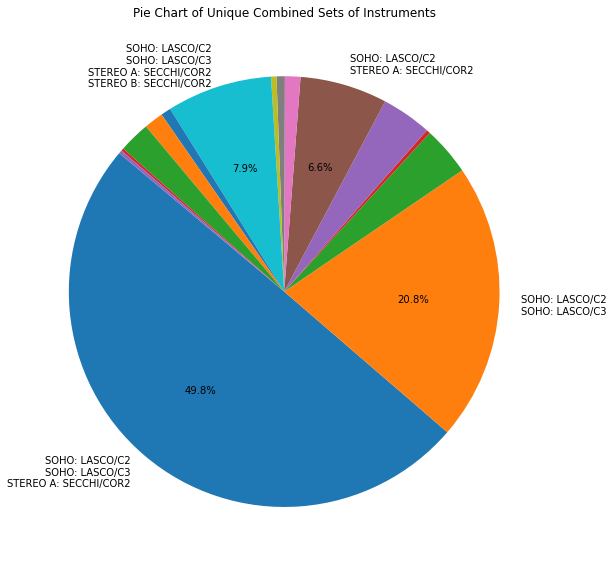

In [36]:
# Extract unique combinations of instruments
instrument_combinations = []
for entry in data:
    if 'instruments' in entry:
        instruments = sorted([instrument['displayName'] for instrument in entry['instruments']])
        instrument_combinations.append(tuple(instruments))

# Count the occurrences of each combination
combination_counts = Counter(instrument_combinations)

# Prepare data for pie chart
total = sum(combination_counts.values())
labels, values = [], []

# Threshold for labeling
threshold = 0.05

for label, value in combination_counts.items():
    labels.append('\n'.join(label))
    values.append(value)

# Generate labels based on threshold
final_labels = [label if value / total > threshold else '' for label, value in zip(labels, values)]

# Plot pie chart
plt.figure(figsize=(12, 8))
plt.pie(values, labels=final_labels, autopct=lambda p: '{:.1f}%'.format(p) if p > threshold * 100 else '', startangle=140)
plt.title('Pie Chart of Unique Combined Sets of Instruments')
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
# Extract indices and dates of entries that include STEREO B
indices_with_stereo_b = []
dates_with_stereo_b = []

for index, entry in enumerate(data):
    if 'instruments' in entry:
        instruments = [instrument['displayName'] for instrument in entry['instruments']]
        if "STEREO B: SECCHI/COR2" in instruments:
            indices_with_stereo_b.append(index)
            dates_with_stereo_b.append(entry['startTime'])

In [28]:
print(indices_with_stereo_b[-5:], dates_with_stereo_b[-5:])

[2745, 2746, 2747, 2748, 2749] ['2014-09-24T21:54Z', '2014-09-25T03:54Z', '2014-09-26T04:38Z', '2014-09-26T10:00Z', '2014-09-27T08:36Z']


In [64]:
print(data[304])

{'activityID': '2016-11-15T12:39:00-CME-001', 'catalog': 'M2M_CATALOG', 'startTime': '2016-11-15T12:39Z', 'sourceLocation': '', 'activeRegionNum': None, 'link': 'https://kauai.ccmc.gsfc.nasa.gov/DONKI/view/CME/11686/-1', 'note': 'large filament eruption seen in SDO 193/304, with AIA 304 showing a roughly N-S oriented filament lifting off located 10-20 deg east of AR 12610 (at around E20N20).', 'submissionTime': '2016-11-16T17:02Z', 'instruments': [{'displayName': 'STEREO B: SECCHI/COR2'}], 'cmeAnalyses': [{'isMostAccurate': False, 'time21_5': '2016-11-16T00:01Z', 'latitude': 23.0, 'longitude': 59.0, 'halfAngle': 34.0, 'speed': 270.0, 'type': 'S', 'featureCode': 'null', 'imageType': None, 'measurementTechnique': 'null', 'note': 'CME NOT visible in C2/3! Only 2-3 very faint images available in STA, very rough measurement, not very reliable! longitude not consistent with source location (east of central meridian)', 'levelOfData': 0, 'tilt': None, 'minorHalfWidth': None, 'speedMeasuredAtHe

TypeError: 'NoneType' object is not iterable

In [24]:
f2010 = open('CME2010.json')
data2010 = json.load(f2010)
print(len(data2010))

44
